In [61]:
import tensorflow as tf
import tensorflow_probability as tfp
import sys
sys.path.append('../Utility_Scripts/')
import matplotlib.pyplot as plt
from synthetic_data_generator import MLR,meal_income
from sklearn.model_selection import train_test_split
# include this https://blog.tensorflow.org/2019/03/regression-with-probabilistic-layers-in.html
import numpy as np

try:
    plt.style.use('rossidata')
except:
    sns.set_style("white")
    

In [5]:
meal_income_dict=meal_income(size=1000)
x_values=meal_income_dict['X']
y_values=meal_income_dict['y']
X_dataset, X_holdout, y_dataset, y_holdout = train_test_split(x_values, y_values, test_size=0.1,random_state=88)


In [43]:
tfd = tfp.distributions

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1 + 1),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.05 * t[..., 1:]))),
])
negloglik = lambda y, p_y: -p_y.log_prob(y)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss=negloglik)

model.fit(x_values, y_values, epochs=500, verbose=False)


In [47]:
yhat = model(x_values)


In [48]:
mean = yhat.mean()
stddev = yhat.stddev()
mean_plus_2_stddev = mean - stddev
mean_minus_2_stddev = mean + stddev

Text(0.5, 1.0, 'TF modeal predictions for \n mean and Standard Deviation')

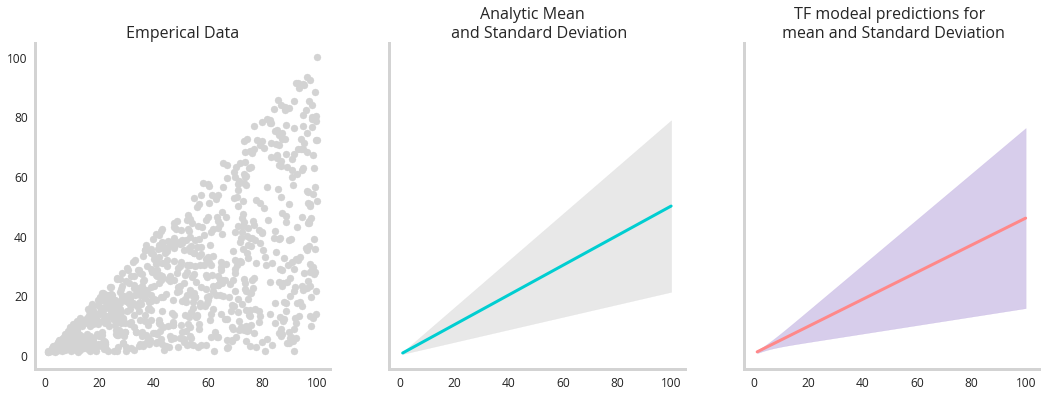

In [63]:
fig,ax=plt.subplots(1,3,figsize=(18,6),sharex=True,sharey=True)
ax[0].scatter(X_dataset.ravel(),y_dataset.ravel(),color='#d3d3d3')



mu=meal_income_dict['mu']
sigma=meal_income_dict['sigma']

ax[1].plot(x_values.ravel(), mu,linewidth=3,color='darkturquoise')
ax[1].fill_between(x_values.ravel(), mu - sigma, mu + sigma, alpha=0.5,color='#d3d3d3')
ax[2].plot(x_values.ravel(), mean.numpy().ravel(),linewidth=3,color='#FF8889')
ax[2].fill_between(x_values.ravel(), mean_minus_2_stddev.numpy().ravel(),mean_plus_2_stddev.numpy().ravel(), alpha=0.5,color='#b19cd9')

ax[0].set_title('Emperical Data')
ax[1].set_title('Analytic Mean  \n and Standard Deviation')
ax[2].set_title('TF modeal predictions for \n mean and Standard Deviation')











In [51]:
len(yhat.mean())

1000

In [13]:
len(mean_minus_2_stddev)

100

In [40]:
np.sort(X_holdout)

NameError: name 'np' is not defined

In [42]:
X_holdout

array([[ 1.95890099],
       [97.06936189],
       [55.27054677],
       [52.64408961],
       [26.16134013],
       [97.37781838],
       [54.86834742],
       [67.3865071 ],
       [87.08312334],
       [56.05225456],
       [35.85305334],
       [74.20589735],
       [48.50030901],
       [99.15816974],
       [70.51149122],
       [59.52931045],
       [26.06061975],
       [91.01915119],
       [83.99743756],
       [33.49102269],
       [43.04849664],
       [86.65882773],
       [75.37794456],
       [95.98197868],
       [16.34279255],
       [55.55060953],
       [ 4.47624876],
       [87.80762747],
       [90.97258865],
       [33.69141313],
       [84.38663693],
       [23.45693639],
       [74.82733945],
       [86.11048039],
       [64.29387197],
       [24.87398744],
       [33.89530164],
       [43.47032483],
       [67.11458377],
       [14.26573492],
       [85.90952519],
       [68.38585291],
       [55.38818893],
       [93.14449559],
       [28.60321277],
       [ 1